# Describing Distributions

Shenyue Jia

In [16]:
# import libraries and set up figure configs
import pandas as pd
import numpy as np
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_context('talk')
sns.set_theme(style="whitegrid")

## Inspect data

In [2]:
df = pd.read_csv('Data/data.csv')
df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               995 non-null    object 
 1   Lat                 1000 non-null   float64
 2   Lng                 1000 non-null   float64
 3   Area                995 non-null    object 
 4   Children            993 non-null    float64
 5   Age                 1000 non-null   int64  
 6   Income              1000 non-null   float64
 7   Marital             995 non-null    object 
 8   Gender              995 non-null    object 
 9   ReAdmis             1000 non-null   int64  
 10  VitD_levels         1000 non-null   float64
 11  Doc_visits          1000 non-null   int64  
 12  Full_meals_eaten    1000 non-null   int64  
 13  vitD_supp           1000 non-null   int64  
 14  Soft_drink          1000 non-null   int64  
 15  Initial_admin       995 non-null    object 
 16  HighBlo

## Plot a histogram with a KDE for selected columns

### `VitD_levels`

In [41]:
# a function to plot a histogram and a boxplot for the selected column
def hist_plot(df,col,col_title):
  """EDA function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, ax = plt.subplots(figsize=(10,5), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  sns.histplot(data=df,x = col,ax = ax,kde=True)
  mean_value = df[col].mean()
  ax.axvline(mean_value,color='red', ls='--', 
           label=f"Mean Value = {mean_value:,.2f}",)

  med_value = df[col].median()
  ax.axvline(med_value,color='green', ls='--', 
           label=f"Median Value = {med_value:,.2f}")

  std = df[col].std()
  plus_one_std = mean_value + std
  minus_one_std = mean_value - std
  
  ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
  ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
  ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)

  ## Updating title of top graph 
  ax.set_title(f'Histogram of {col_title}',fontsize = 14, weight='bold')
  ax.set_xlabel(col_title)
  ax.legend();

  ## Save PNG
  FOLDER = "PNG/"
  isExist = os.path.exists(FOLDER)
    
  if isExist == False:  
      os.makedirs(FOLDER, exist_ok=True)
        
  plt.savefig(f'{FOLDER}/{col}_hist.png',bbox_inches='tight')

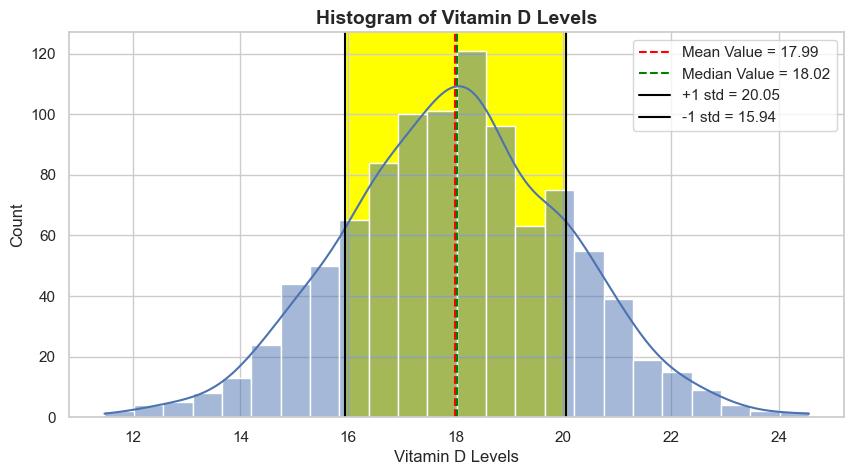

In [42]:
# plot histogram with annotations
hist_plot(df,'VitD_levels','Vitamin D Levels')

- Is it Discrete or Continuous?
    - Continuous
- Does it have a skew? If so, which direction (+/-)
    - No
- What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)
    - Mesokurtic (Kurtosis ~ 3)

In [43]:
# calculate kurtosis
kurt = stats.kurtosis(df['VitD_levels'], fisher = False)
kurt

3.013147515833447

### `Doc_visits`

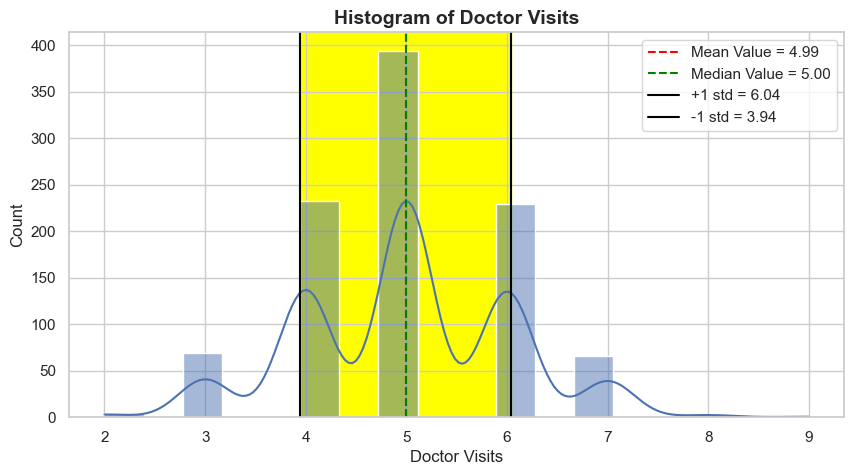

In [44]:
# plot histogram with annotations
hist_plot(df,'Doc_visits','Doctor Visits')

- Is it Discrete or Continuous?
    - Discrete
- Does it have a skew? If so, which direction (+/-)
    - No
- What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)
    - Mesokurtic (Kurtosis ~ 3), slightly towards Platykurtic as Kurtosis = 2.99

In [35]:
# calculate kurtosis
kurt = stats.kurtosis(df['Doc_visits'], fisher = False)
kurt

2.9919958083381206

### `TotalCharge`

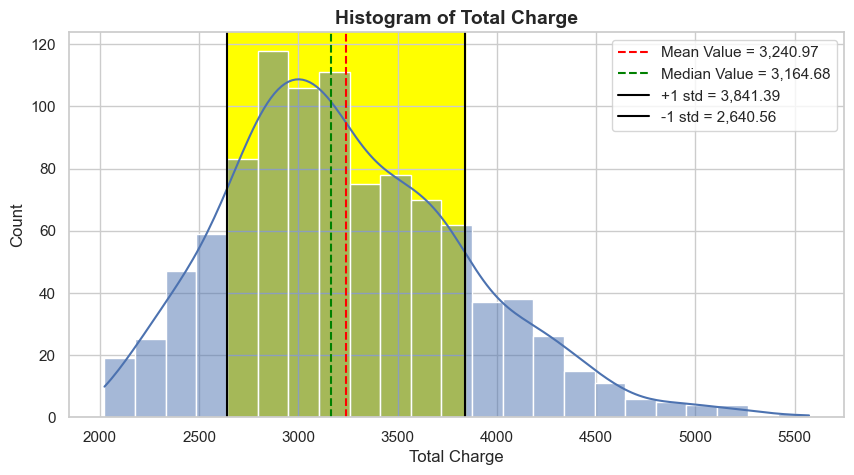

In [45]:
# plot histogram with annotations
hist_plot(df,'TotalCharge','Total Charge')

- Is it Discrete or Continuous?
    - Continuous
- Does it have a skew? If so, which direction (+/-)
    - Yes, a negative skew
- What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)
    - Leptokurtic (Kurtosis > 3)

In [37]:
# calculate kurtosis
kurt = stats.kurtosis(df['TotalCharge'], fisher = False)
kurt

3.2650077463439384